In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv("mxmh.csv")

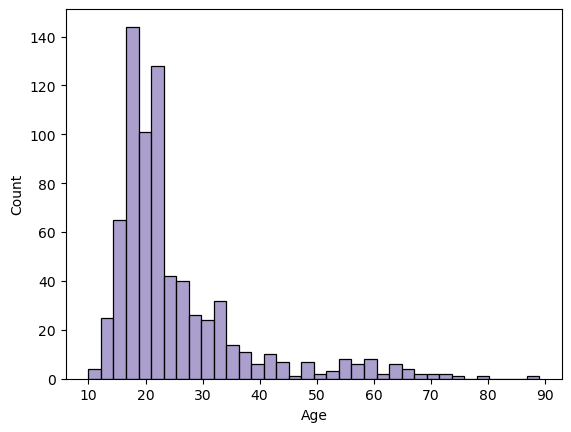

In [19]:
sns.histplot(df_main["Age"],color="#8F81BD")
plt.show()

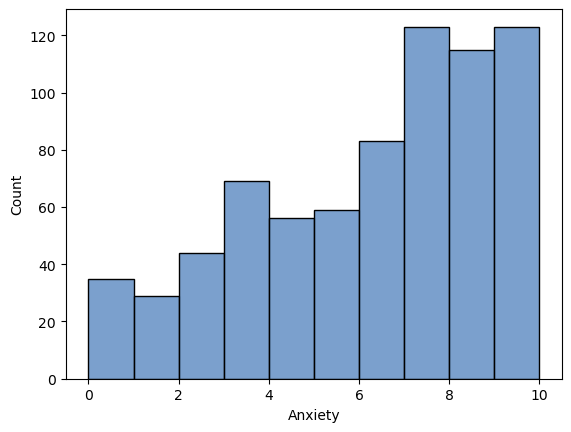

In [4]:
sns.histplot(df_main["Anxiety"],bins=10,color="#4F81BD")
plt.show()

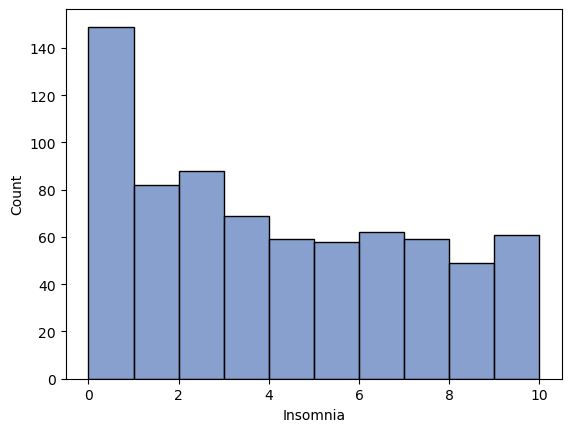

In [18]:
sns.histplot(df_main["Insomnia"],bins=10,color="#5F81BD")
plt.show()

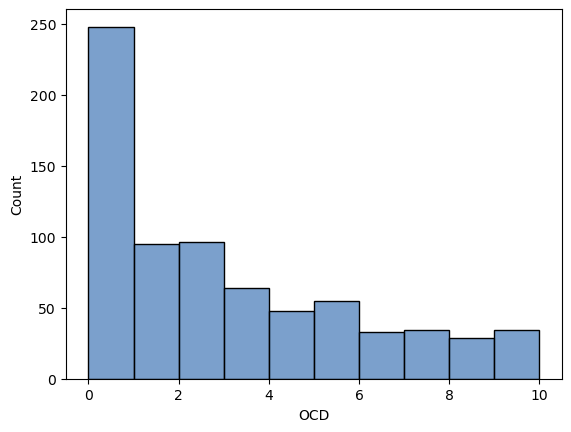

In [17]:
sns.histplot(df_main["OCD"],bins=10,color="#4F81BC")
plt.show()

In [8]:
df_age = df_main[["Anxiety","Depression","Insomnia","OCD","Age"]].copy()
df_age["CATE"] = pd.cut(df_age["Age"].tolist(),list(range(0, 100, 10)))

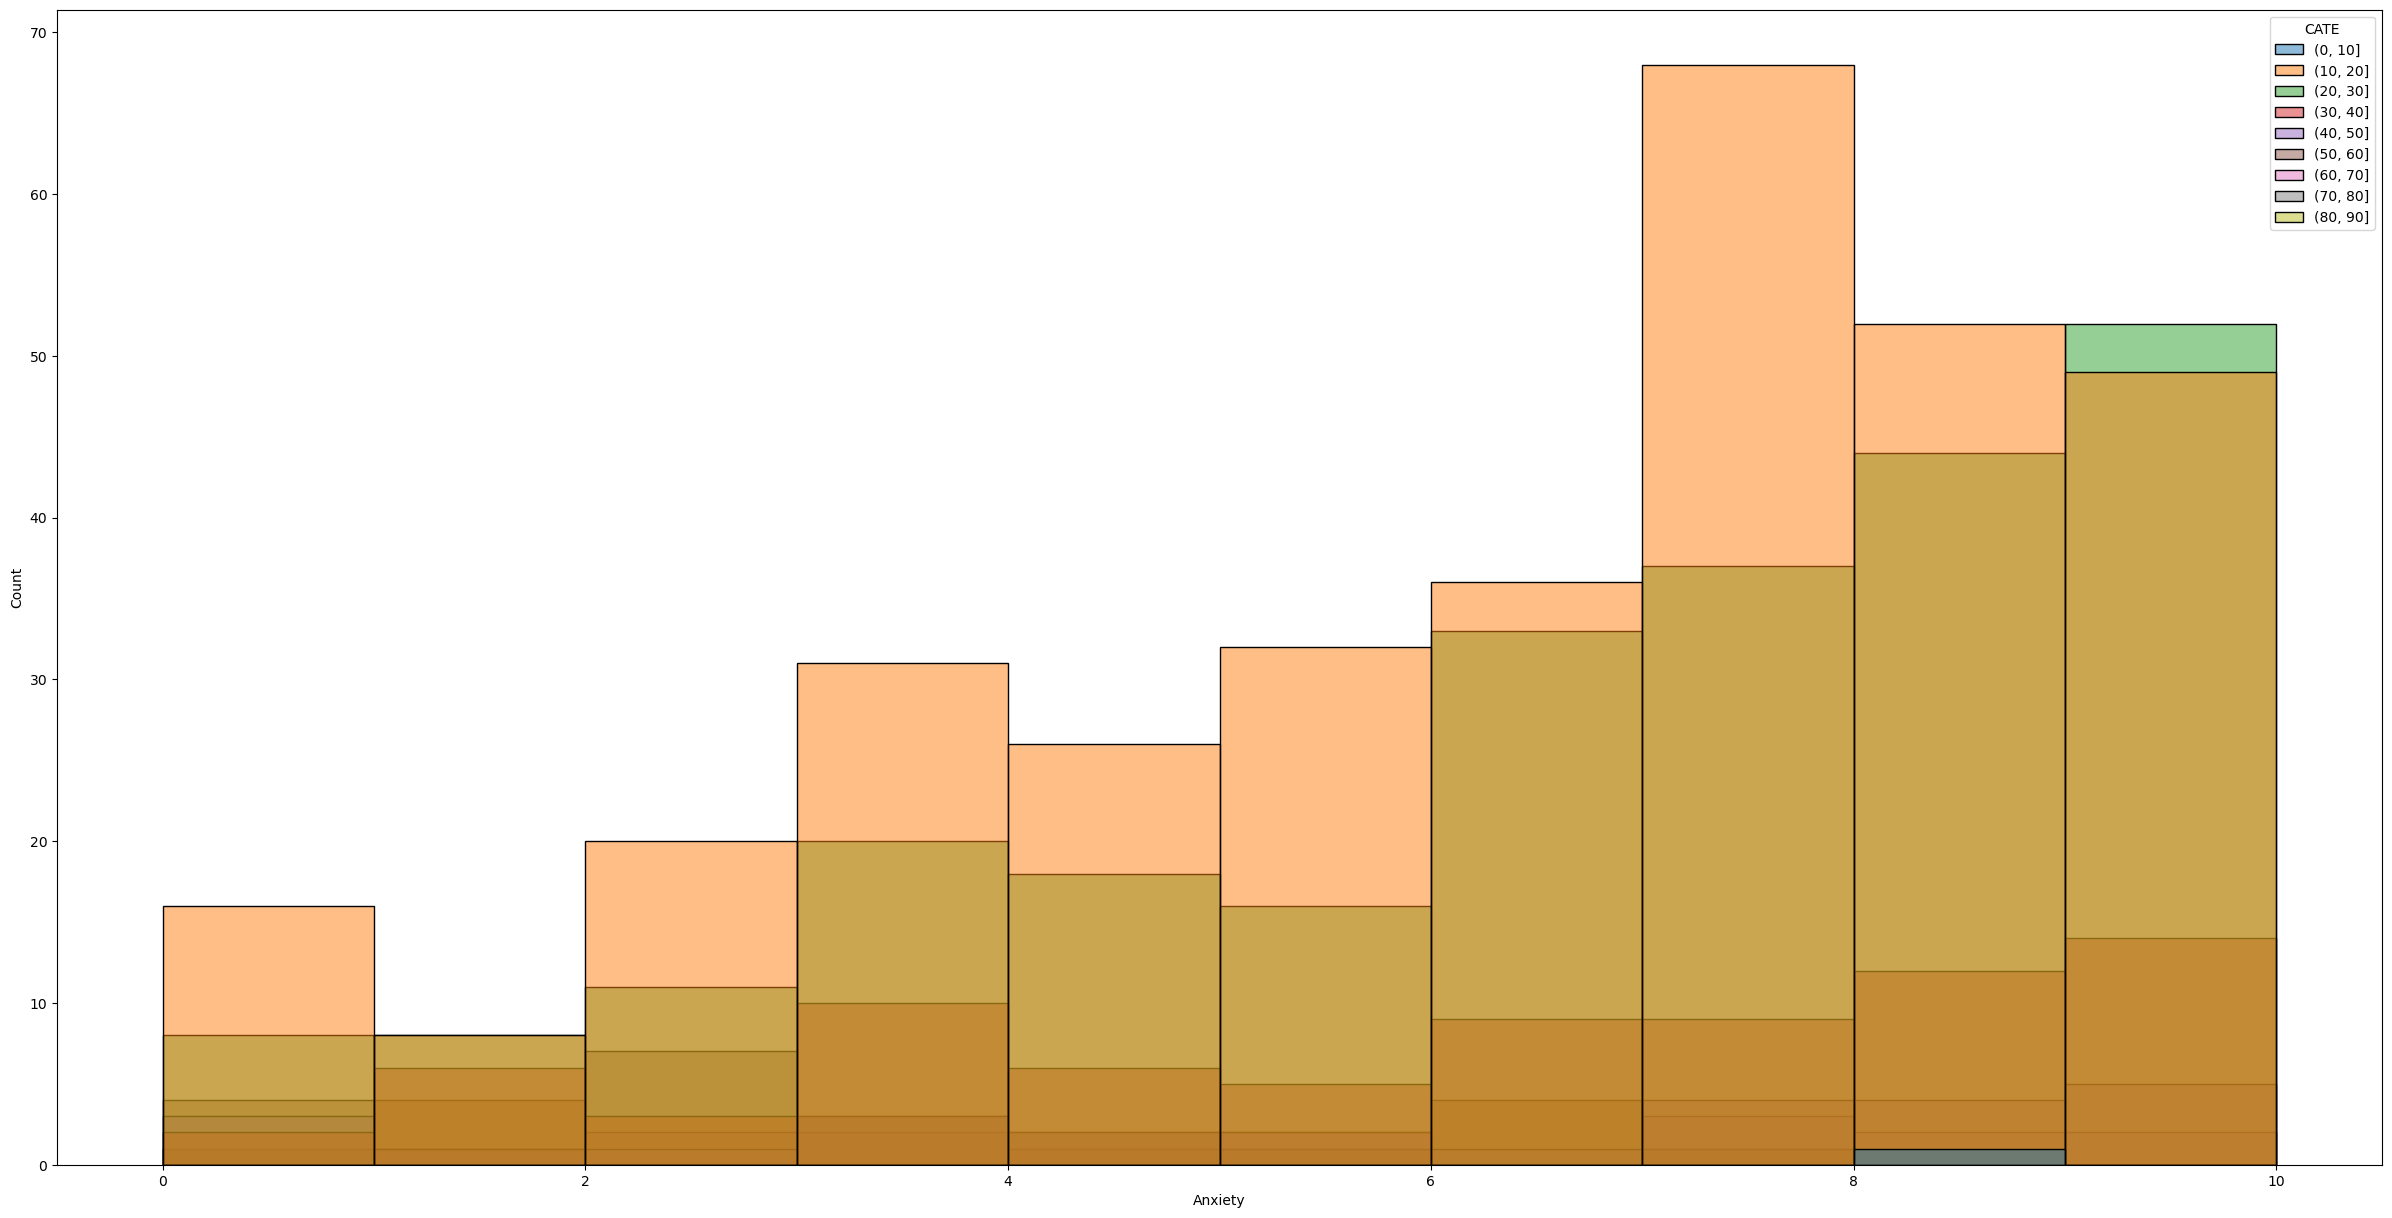

In [16]:
plt.figure(figsize=(30, 15))
sns.histplot(df_age, x="Anxiety",bins=10,color="#4F81BD",hue="CATE", multiple="layer")
plt.show()

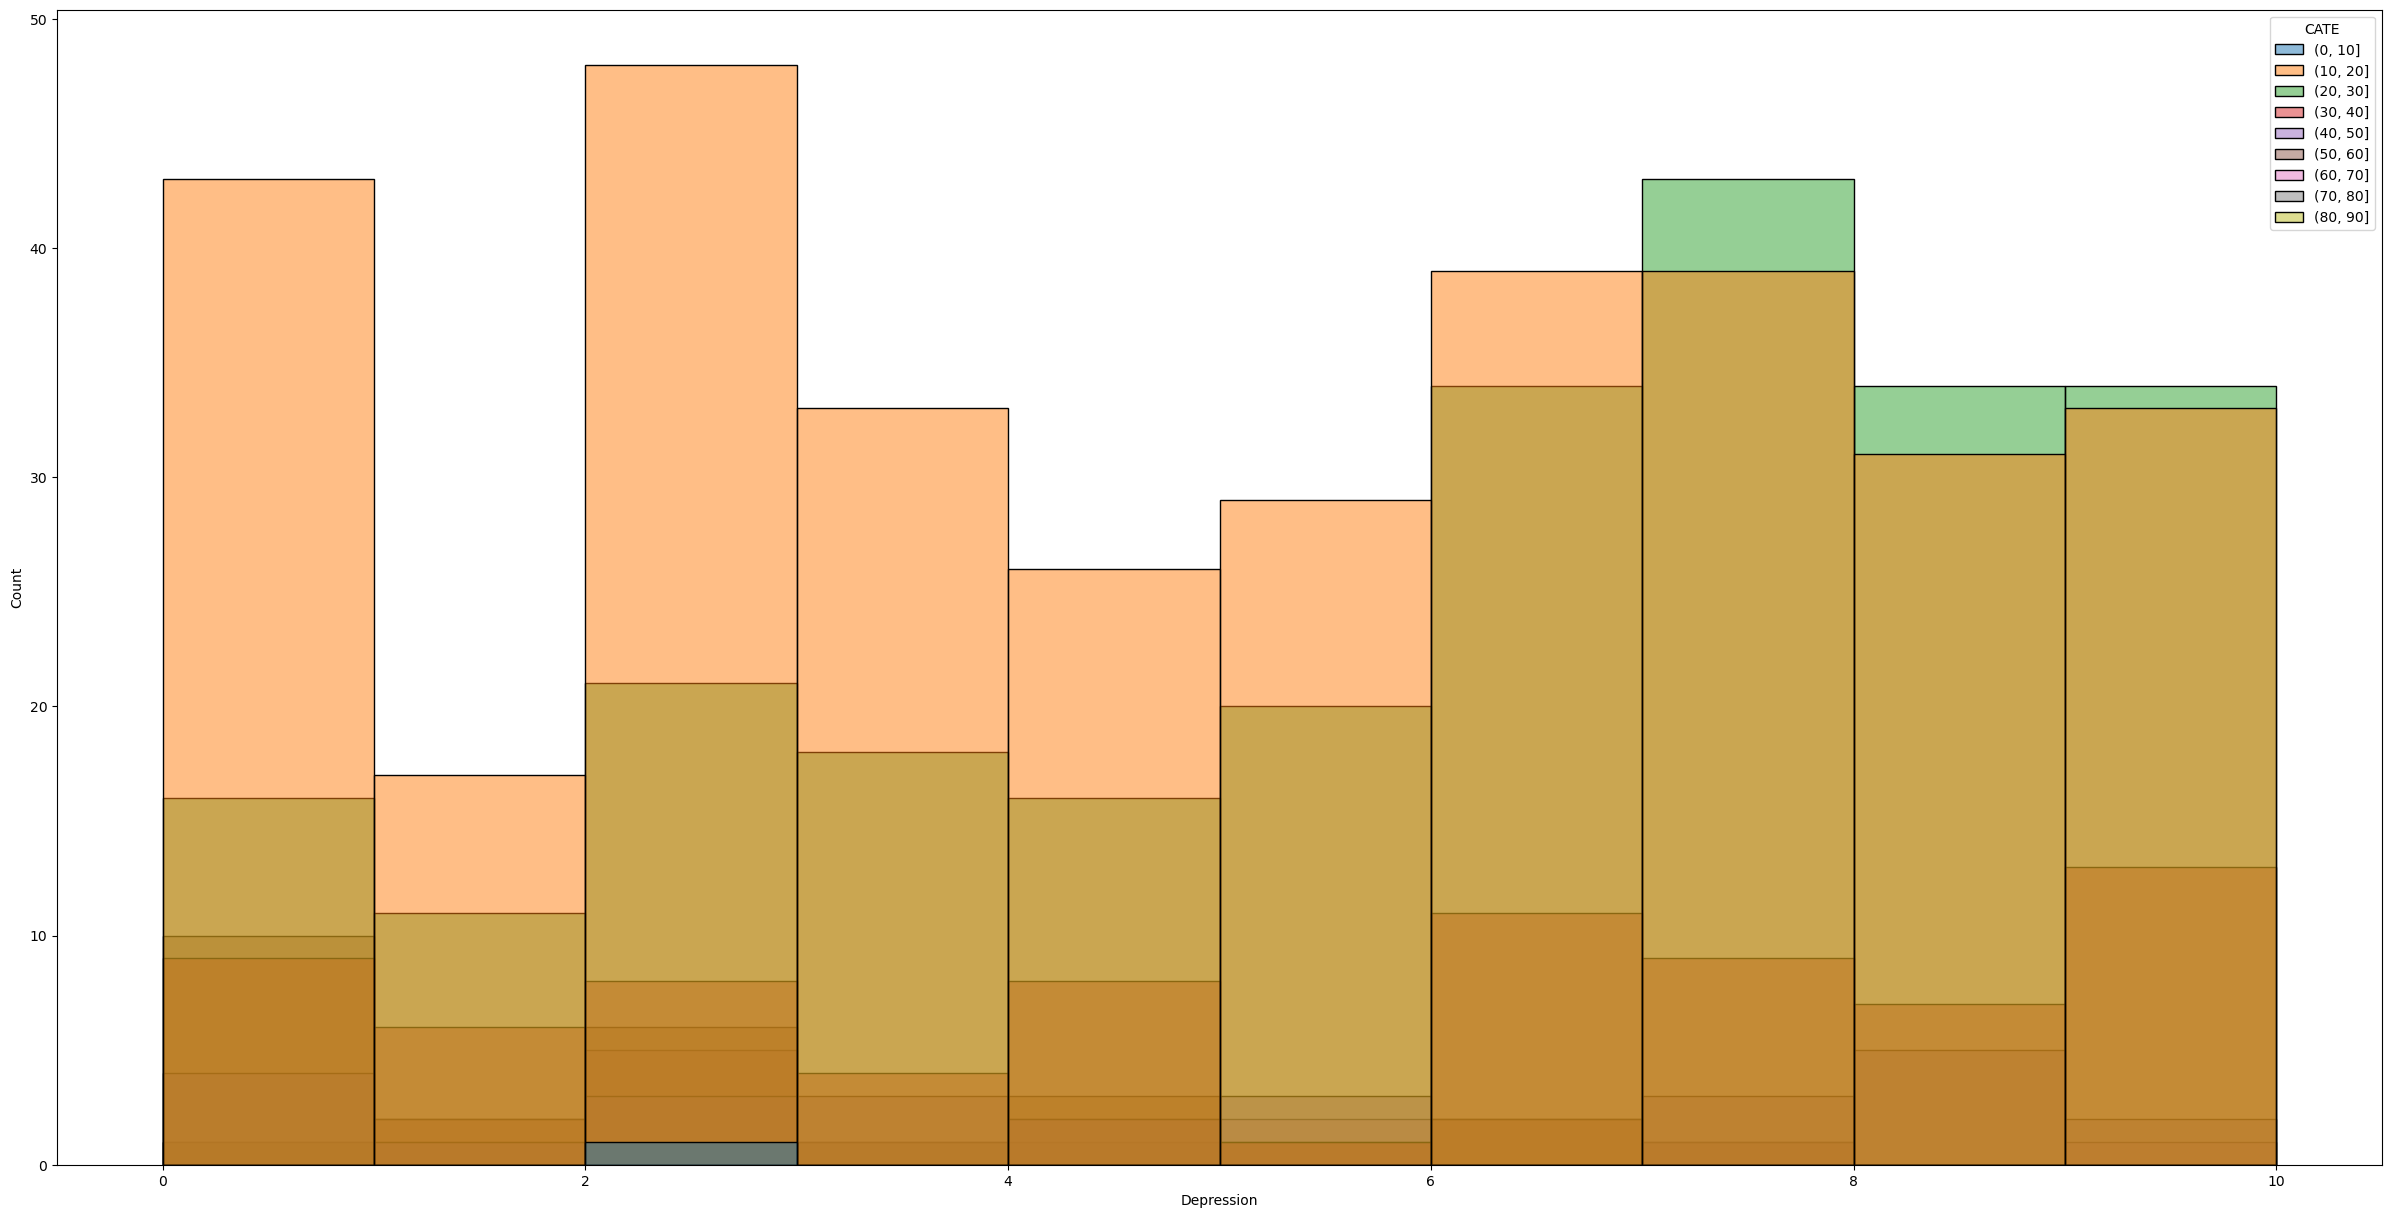

In [15]:
plt.figure(figsize=(30, 15))
sns.histplot(df_age, x="Depression",bins=10,color="#4F81BD",hue="CATE", multiple="layer")
plt.show()

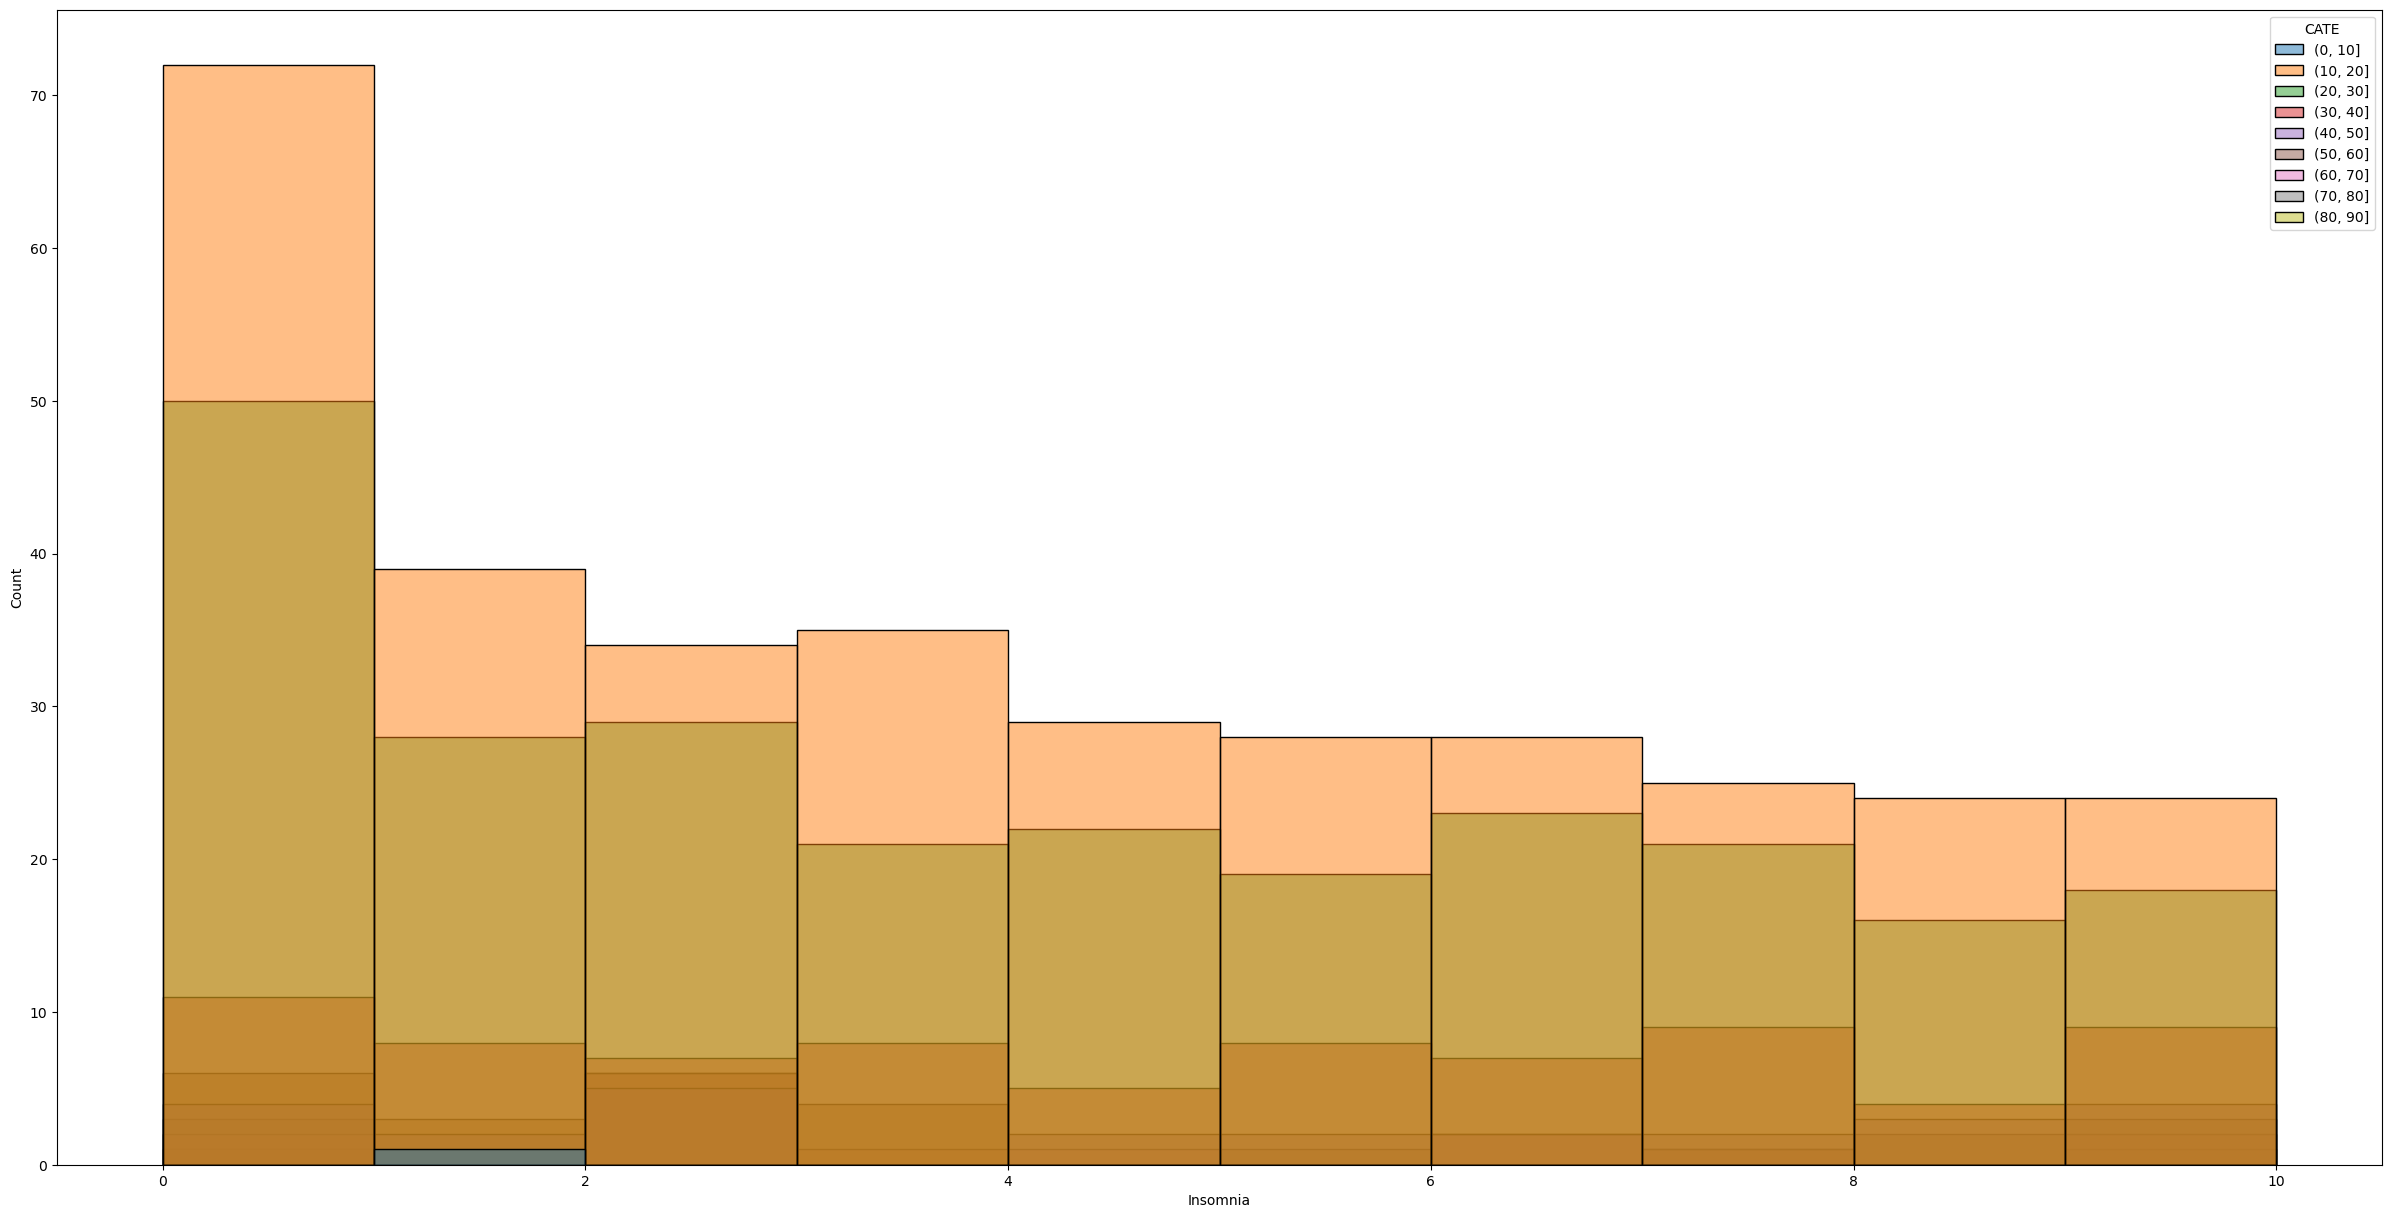

In [14]:
plt.figure(figsize=(30, 15))
sns.histplot(df_age, x="Insomnia",bins=10,color="#4F81BD",hue="CATE", multiple="layer")
plt.show()

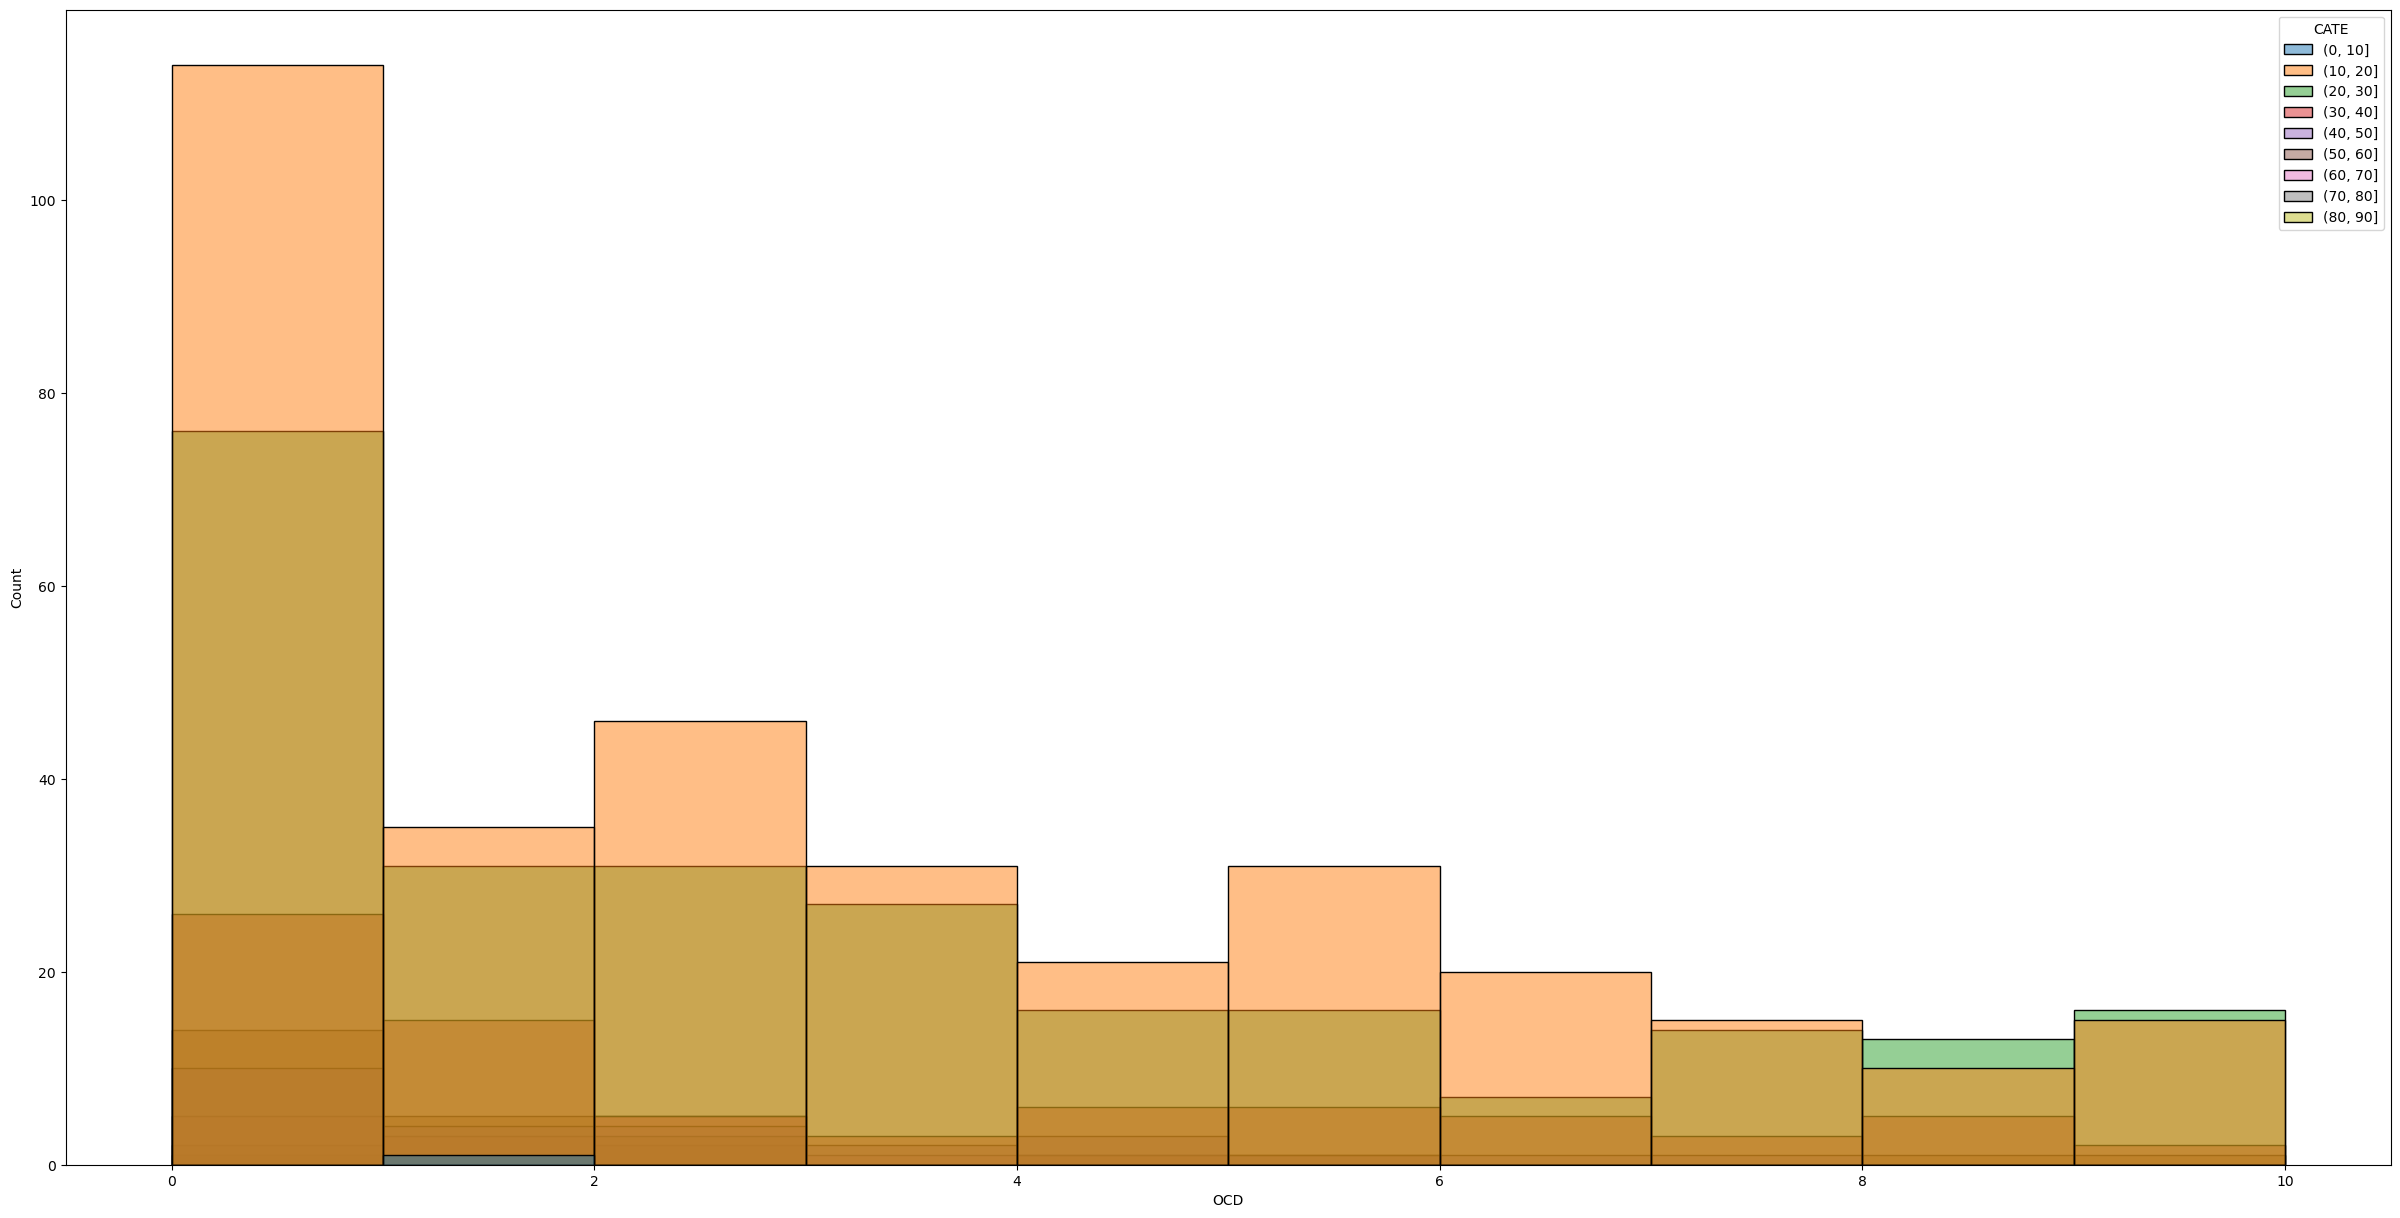

In [20]:
plt.figure(figsize=(30, 15))
sns.histplot(df_age, x="OCD",bins=10,color="#4F81BD",hue="CATE", multiple="layer")
plt.show()

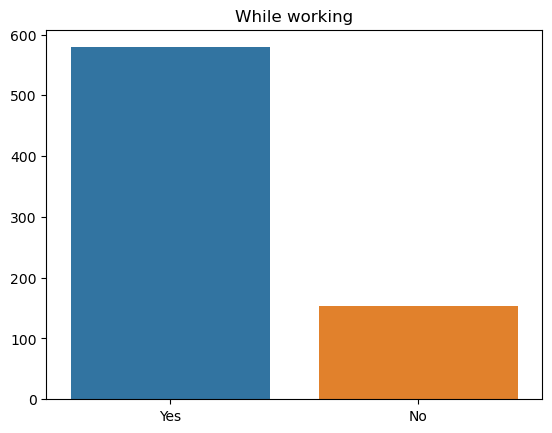

In [21]:
sns.countplot(x="While working", data=df_main).set(title = "While working",xlabel=None,ylabel=None)
plt.show()

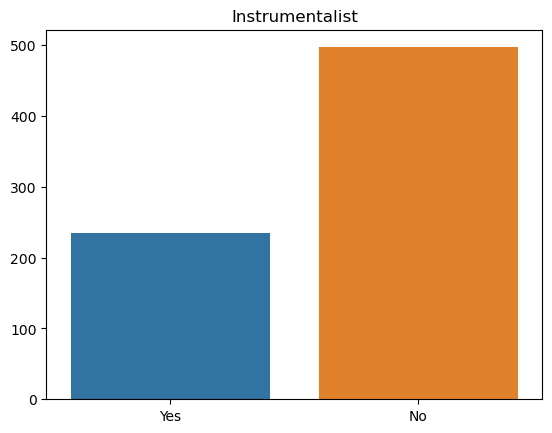

In [22]:
sns.countplot(x="Instrumentalist", data=df_main).set(title = "Instrumentalist",xlabel=None,ylabel=None)
plt.show()

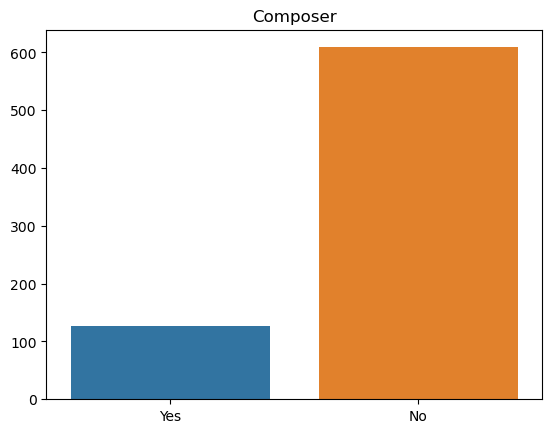

In [23]:
sns.countplot(x="Composer", data=df_main).set(title = "Composer",xlabel=None,ylabel=None)
plt.show()

In [24]:
genrelist = pd.DataFrame(index=[], columns=["Name","Count"])
for i in df_main["Fav genre"].unique():  
    genrelist = genrelist.append(pd.DataFrame([[i,df_main["Fav genre"][df_main["Fav genre"] == i].count()]], columns=["Name","Count"]), ignore_index=True)
genrelist.sort_values(by="Count",inplace=True,ascending=False)

C:\Users\Thakur\AppData\Local\Temp\ipykernel_89300\731092091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genrelist = genrelist.append(pd.DataFrame([[i,df_main["Fav genre"][df_main["Fav genre"] == i].count()]], columns=["Name","Count"]), ignore_index=True)
C:\Users\Thakur\AppData\Local\Temp\ipykernel_89300\731092091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genrelist = genrelist.append(pd.DataFrame([[i,df_main["Fav genre"][df_main["Fav genre"] == i].count()]], columns=["Name","Count"]), ignore_index=True)
C:\Users\Thakur\AppData\Local\Temp\ipykernel_89300\731092091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genrelist = genrelist.append(pd.DataFrame([[i,df_main["Fav genre"][df_main["Fav genre"] == i

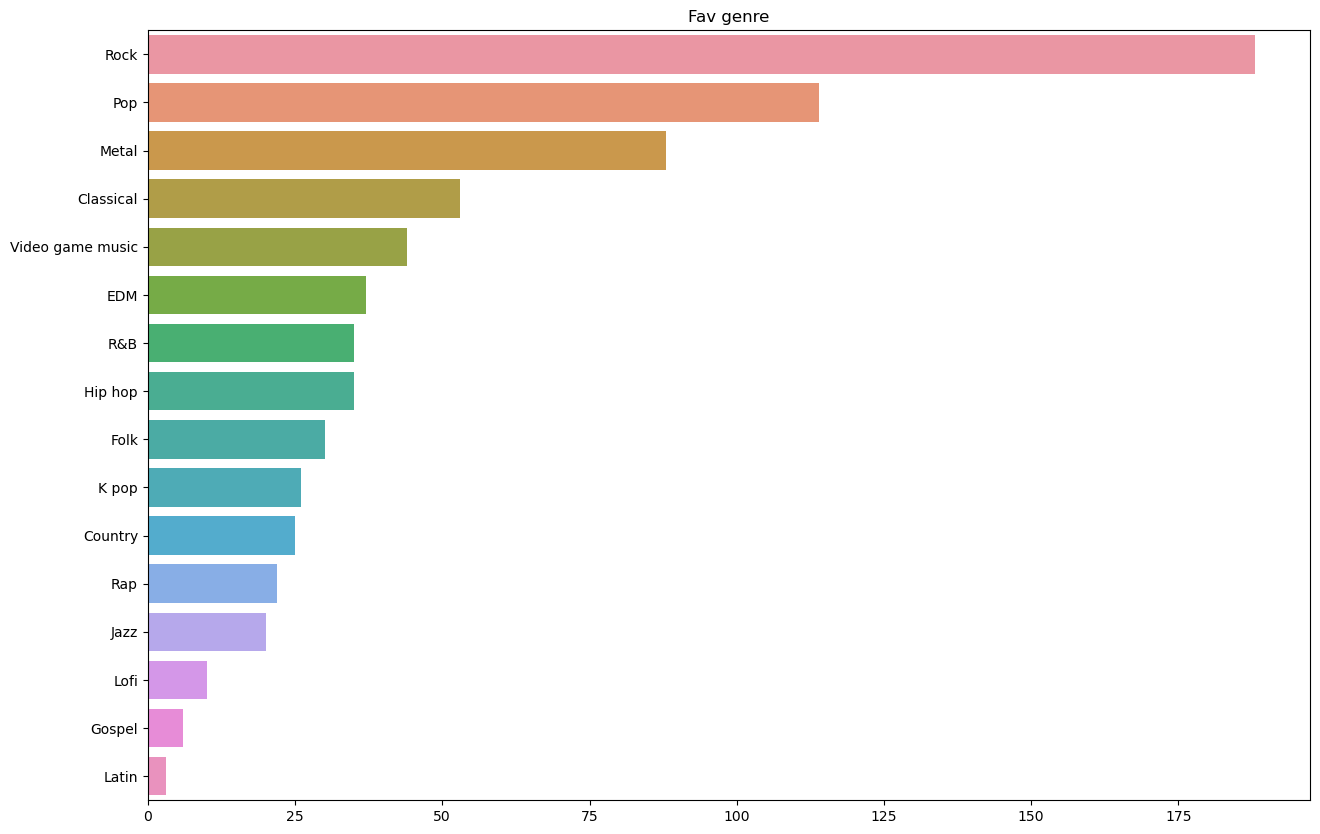

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x=genrelist.Count, y=list(genrelist.Name), data=genrelist).set(title = "Fav genre",xlabel=None,ylabel=None)
plt.show()

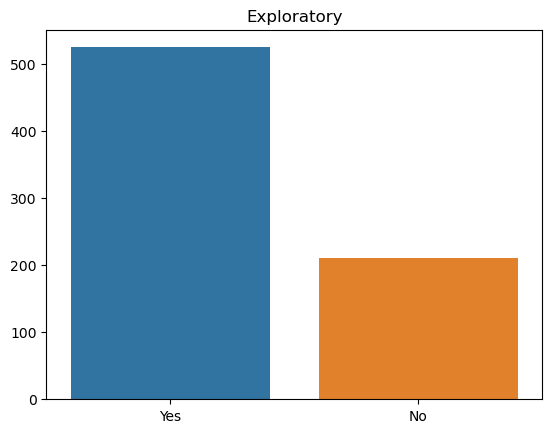

In [26]:
sns.countplot(x="Exploratory", data=df_main).set(title = "Exploratory",xlabel=None,ylabel=None)
plt.show()

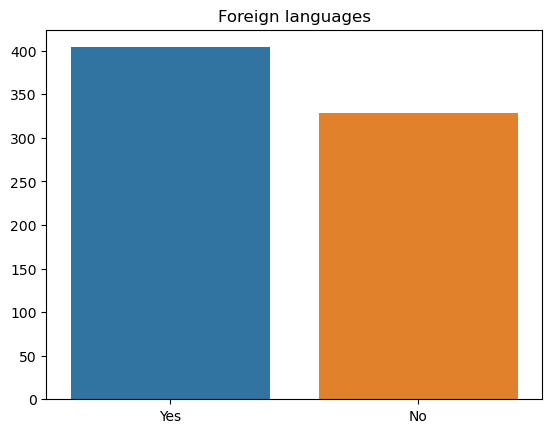

In [27]:
sns.countplot(x="Foreign languages", data=df_main).set(title = "Foreign languages",xlabel=None,ylabel=None)
plt.show()

In [28]:
data = df_main["Primary streaming service"].value_counts()
labels = list(df_main["Primary streaming service"].dropna().unique())
colors = sns.color_palette('bright')

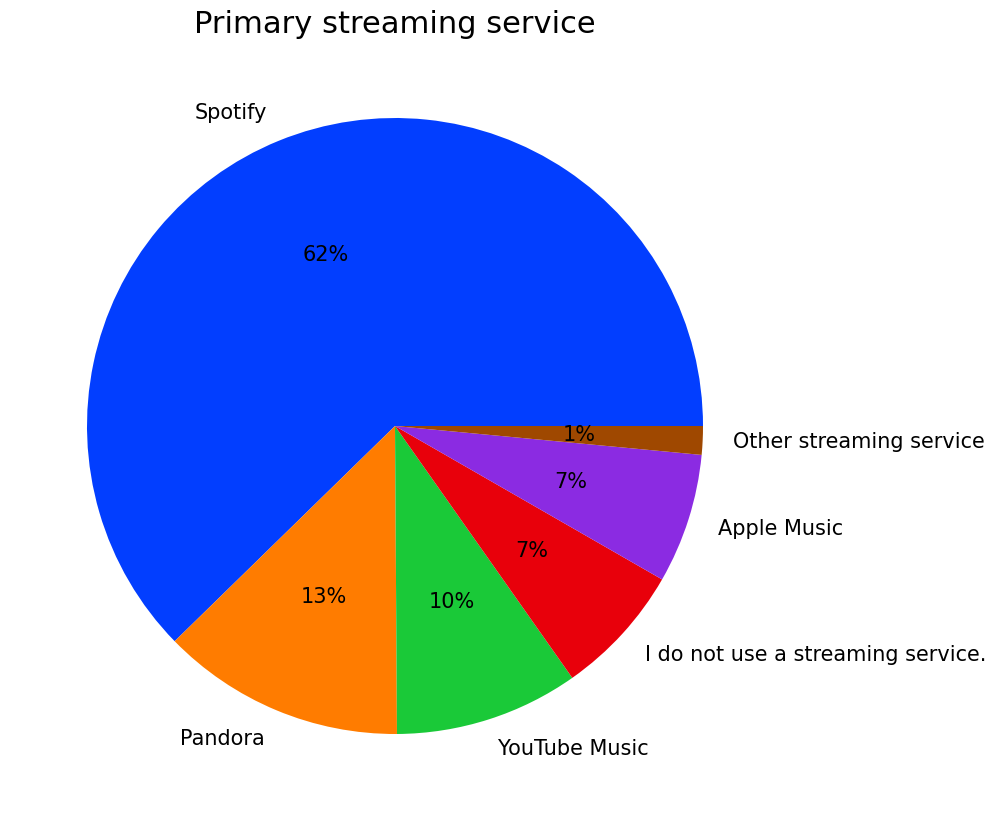

In [29]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15.0
plt.title("Primary streaming service",fontsize = 22)
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

In [30]:
def correlation_ratio(cat_key, num_key, data):

    categorical=data[cat_key]
    numerical=data[num_key]

    mean=numerical.dropna().mean()
    all_var=((numerical-mean)**2).sum()

    unique_cat=pd.Series(categorical.unique())
    unique_cat=list(unique_cat.dropna())

    categorical_num=[numerical[categorical==cat] for cat in unique_cat]
    categorical_var=[len(x.dropna())*(x.dropna().mean()-mean)**2 for x in categorical_num] 
    
    r=sum(categorical_var)/all_var

    return r

In [31]:
def get_corr(c_col,n_col,data):
    corr_ratio=pd.DataFrame({})

    for key1 in c_col:
        for key2 in n_col:
          r=correlation_ratio(key1, key2, data)
          corr_ratio.loc[key1, key2]=r               
                 

    return corr_ratio

In [32]:
taegetlist = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
datalist= ['Frequency [Classical]',
'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

In [33]:
get_corr(datalist,taegetlist,df_main)

,Anxiety,Depression,Insomnia,OCD
Frequency [Classical],0.005830,0.001440,0.006835,0.001618
Frequency [Country],0.006266,0.007451,0.006062,0.006400
Frequency [EDM],0.007651,0.020565,0.007711,0.010375
Frequency [Folk],0.013672,0.013053,0.005623,0.002997
Frequency [Gospel],0.003257,0.002535,0.001838,0.004657
Frequency [Hip hop],0.004619,0.026356,0.007606,0.006935
Frequency [Jazz],0.000719,0.003839,0.005954,0.001206
Frequency [K pop],0.002635,0.004082,0.000435,0.000700
Frequency [Latin],0.005765,0.001459,0.004609,0.002695
Frequency [Lofi],0.017697,0.008415,0.005408,0.006193


In [34]:
get_corr(["Music effects"],taegetlist,df_main)

,Anxiety,Depression,Insomnia,OCD
Music effects,0.021693,0.018997,0.001657,0.003453
